In [4]:
!pip install transformers accelerate matplotlib --quiet


In [10]:
!pip install --upgrade transformers tokenizers


  Using cached transformers-4.52.4-py3-none-any.whl.metadata (38 kB)
  Using cached tokenizers-0.21.1-cp39-abi3-win_amd64.whl.metadata (6.9 kB)
Using cached transformers-4.52.4-py3-none-any.whl (10.5 MB)
Using cached tokenizers-0.21.1-cp39-abi3-win_amd64.whl (2.4 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.2
    Uninstalling tokenizers-0.15.2:
      Successfully uninstalled tokenizers-0.15.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2


  You can safely remove it manually.


In [12]:
import transformers
import tokenizers

print("Transformers version:", transformers.__version__)
print("Tokenizers version:", tokenizers.__version__)


Transformers version: 4.52.4
Tokenizers version: 0.21.1


In [1]:


import numpy
print(numpy.__version__)


1.26.4


In [3]:
from transformers import Blip2Processor
processor = Blip2Processor.from_pretrained("Salesforce/blip2-flan-t5-xl")


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


processor_config.json:   0%|          | 0.00/68.0 [00:00<?, ?B/s]

D:\1\anaconda\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in D:\huggingface_cache\hub\models--Salesforce--blip2-flan-t5-xl. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [5]:
import random
import glob
import os
from PIL import Image
import torch
from transformers import Blip2Processor, Blip2ForConditionalGeneration

# Load model and processor
processor = Blip2Processor.from_pretrained("Salesforce/blip2-flan-t5-xl")
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-flan-t5-xl").to("cuda" if torch.cuda.is_available() else "cpu")

# Settings
root_path = r"D:\LLM\results"
categories = ["glioma", "minigoma", "pituitary tumor"]
samples_per_category = 3

# Iterate over each class and sample
for category in categories:
    folder = os.path.join(root_path, category)
    image_files = glob.glob(os.path.join(folder, "*.png"))
    
    sampled_files = random.sample(image_files, min(samples_per_category, len(image_files)))
    
    print(f"\nClass: {category.upper()}")
    for img_path in sampled_files:
        image = Image.open(img_path).convert("RGB")
        inputs = processor(images=image, return_tensors="pt").to(model.device)
        output = model.generate(**inputs, max_new_tokens=100)
        caption = processor.tokenizer.decode(output[0], skip_special_tokens=True)
        print(f"{os.path.basename(img_path)}:\n{caption}\n")


config.json:   0%|          | 0.00/2.22k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/128k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.96G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/5.81G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/168 [00:00<?, ?B/s]


Class: GLIOMA
Glioma_enh_1855.png:
and their relationship to the underlying pathology

Glioma_enh_2162.png:
and their relationship to the underlying pathology

Glioma_enh_1882.png:
and their relationship to the underlying pathology


Class: MINIGOMA

Class: PITUITARY TUMOR
Pituitary tumor_enh_1700.png:
and their relationship to the underlying pathology

Pituitary tumor_enh_1761.png:
and their relationship to the underlying pathology

Pituitary tumor_enh_1840.png:
and their relationship to the underlying pathology



Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Loading BLIP2 model...


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Model loaded.


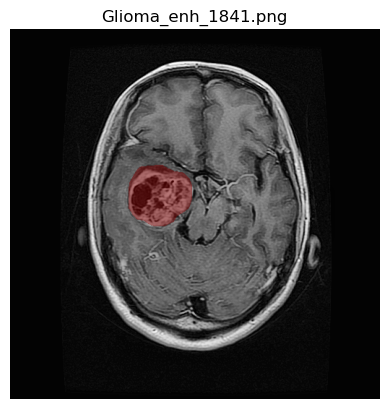

Glioma_enh_1841.png
→ mri, mri images, mri images, mri images, mri images, mri images, mri images, mri images, mri images, mri images, mri images, mri images, mri images, mri images, mri images, mri images, mri images
------------------------------------------------------------


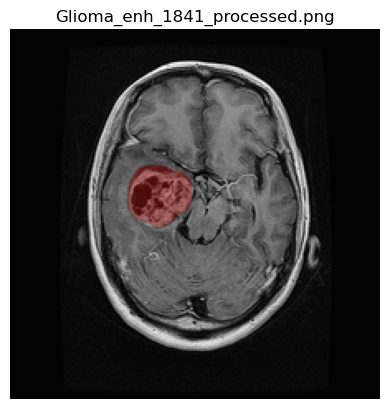

KeyboardInterrupt: 

In [1]:
import os
import glob
from PIL import Image
import matplotlib.pyplot as plt

import torch
from transformers import Blip2Processor, Blip2ForConditionalGeneration

image_dir = r"D:\LLM\heatmaps"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print("Loading BLIP2 model...")
processor = Blip2Processor.from_pretrained("Salesforce/blip2-flan-t5-xl")
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-flan-t5-xl").to(device)
print("Model loaded.")

# Captioning prompt
instruction = (
    "You are a radiologist analyzing a brain MRI image. The scan is grayscale, and the tumor is highlighted using a red heatmap. "
    "Write a concise medical-style description of the tumor's location, size, and characteristics based on the heatmap."
)

image_files = glob.glob(os.path.join(image_dir, "*.png"))  # Adjust extension if needed

for img_path in image_files:
    try:
        image = Image.open(img_path).convert("RGB")  

        # Show image
        plt.imshow(image)
        plt.axis("off")
        plt.title(os.path.basename(img_path))
        plt.show()

        # Preprocess input
        inputs = processor(images=image, text=instruction, return_tensors="pt").to(device)

        # Generate caption
        output = model.generate(**inputs, max_new_tokens=100)
        caption = processor.tokenizer.decode(output[0], skip_special_tokens=True)

        # Print results
        print(f"{os.path.basename(img_path)}")
        print(f"→ {caption}")
        print("-" * 60)

    except Exception as e:
        print(f"Failed to process {img_path}: {e}")
